In [1]:
import cv2
import numpy as np
import os
import sys
import random
import matplotlib.pyplot as plt
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

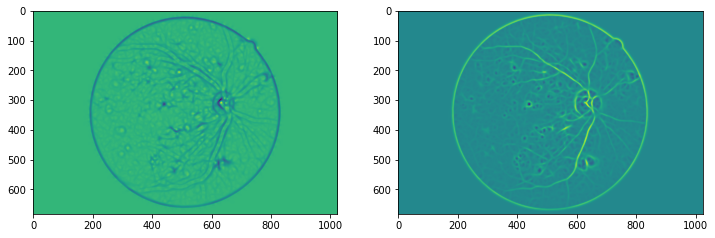

In [47]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

Example_Image = cv2.imread("./images/3/34445_right.jpeg")
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=4,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[1].imshow(max_S)

In [20]:
def get_random_image():
    path = "./images/"
    folder = random.randint(0,4)
    img = random.choice(os.listdir(path + str(folder)))
    return path + str(folder) + "/" + img
    

In [27]:
get_random_image()

'./Diabetic-Retinopathy/images/1/41804_left.jpeg'

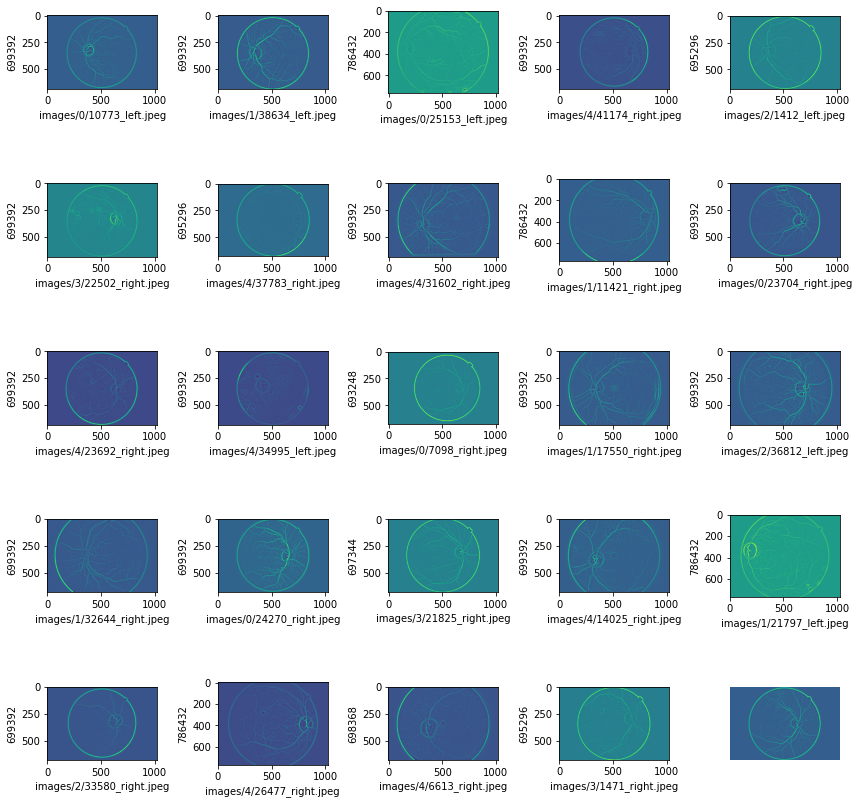

In [48]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(12,12))
for i,ax in enumerate(axis.flat):
    img = get_random_image()
    Example_Image = cv2.imread(img)
    Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)

    Hessian_Mat = hessian_matrix(Example_Image,sigma=4,order="rc")
    max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)
    ax.set_xlabel("/".join(img.split("/")[2:]))
    ax.set_ylabel(max_S.size)
    ax.imshow(max_S)
plt.tight_layout()
plt.axis("off")
plt.show()